# <span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">Telco Customer Churn data:


### Problem statement

The dataset belongs to Telco Customer Churn. I am building a model to predict the customer churn using the features available in the dataset

<a id='the_destination'></a>


### <span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;"> Loading the libraries: 

<a id='the_destination'></a>


In [31]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import scale
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix

### <span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">  
    
### EDA
    
<a id='the_destination'></a>


In [32]:
df = pd.read_csv("Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### <span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">  
    
### Shape
    
<a id='the_destination'></a>


In [33]:
df.shape

print("no. of rows: ",df.shape[0], "\n""no. of columns: ",df.shape[1])

no. of rows:  7043 
no. of columns:  21


In [34]:
#removing customerid from dataset

df = df.drop(['customerID'], axis=1)

### <span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">  
    
### Data types of data features
    
<a id='the_destination'></a>


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [36]:
# Are there any missing values ?
df.isnull().sum().sort_values(ascending=False)

Churn               0
TotalCharges        0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
gender              0
dtype: int64

There are no missing values

### <span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">  
    
### Data cleaning
    
<a id='the_destination'></a>


In [37]:
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')
df['TotalCharges'].dtypes

dtype('float64')

In [38]:
df.dropna(subset=['TotalCharges'],inplace=True)

In [39]:
df['SeniorCitizen']=df['SeniorCitizen'].astype('object')

In [40]:
df['Churn']=df['Churn'].map({'No':0,'Yes':1})

In [41]:
df['Churn'].value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [42]:
df_cat=df.select_dtypes(include='object')
df_num=df.select_dtypes(include=np.number)

In [43]:
df_num=df_num.drop('Churn',axis=1)

In [44]:
df.describe()

,tenure,MonthlyCharges,TotalCharges,Churn
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441,0.265785
std,24.545260,30.085974,2266.771362,0.441782
min,1.000000,18.250000,18.800000,0.000000
25%,9.000000,35.587500,401.450000,0.000000
50%,29.000000,70.350000,1397.475000,0.000000
75%,55.000000,89.862500,3794.737500,1.000000
max,72.000000,118.750000,8684.800000,1.000000


<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">  Univariate analysis

C:\Users\Chirag\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Chirag\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Chirag\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (

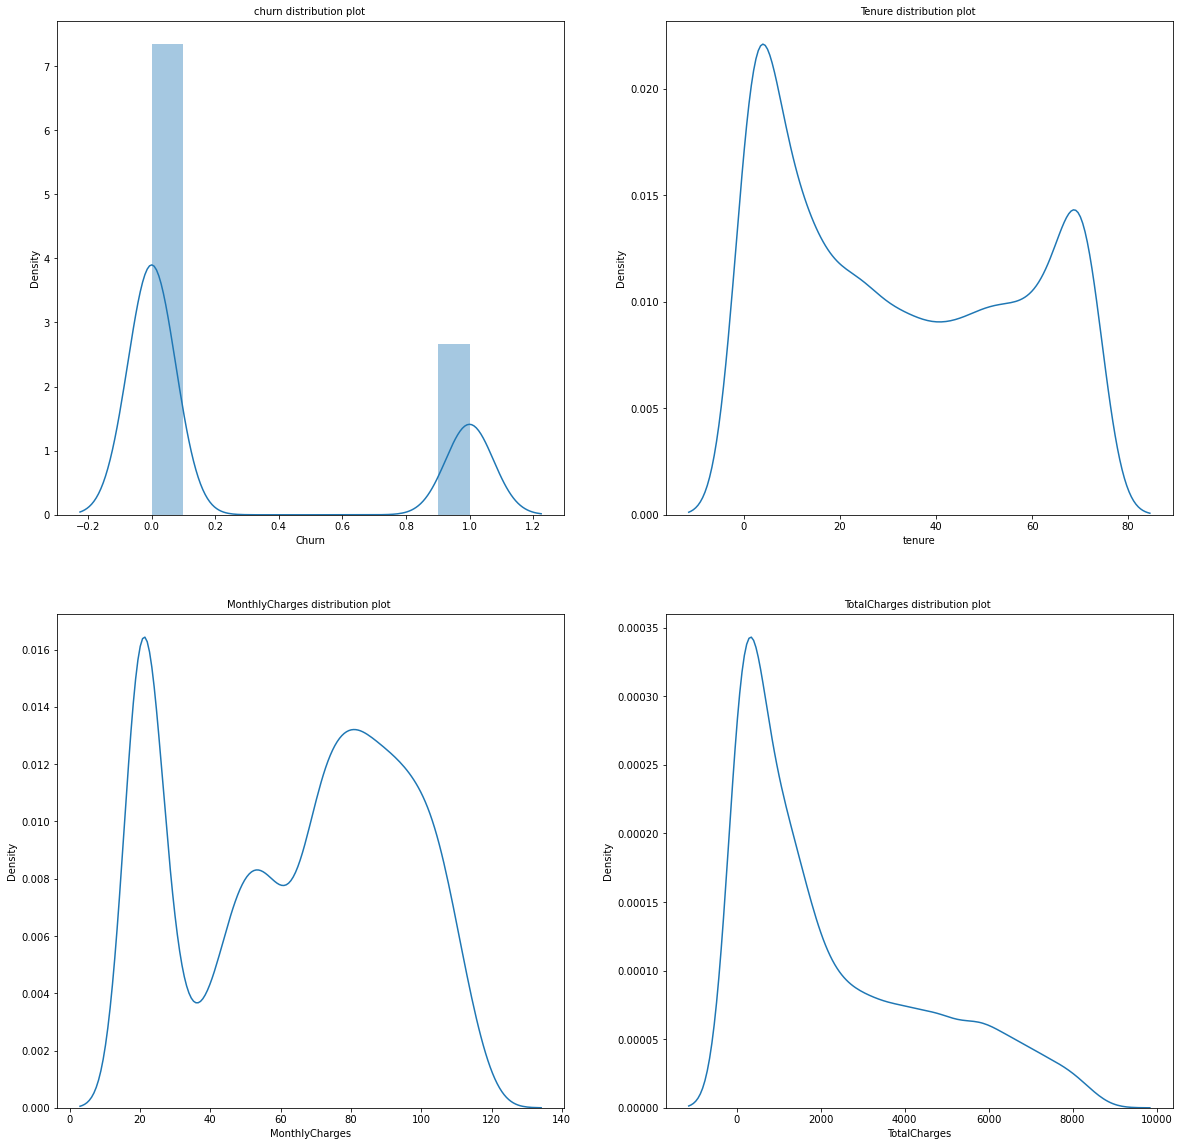

In [45]:
# Create distribution plot for data set

fig, axes = plt.subplots(nrows=2, ncols =2)
fig.set_size_inches(20, 20)

a=sns.distplot(df['Churn'],hist=True, ax=axes[0][0])
a.set_title("churn distribution plot ", fontsize=10)

b=sns.distplot(df['tenure'], hist=False, ax=axes[0][1])
b.set_title("Tenure distribution plot ", fontsize=10)

c=sns.distplot(df['MonthlyCharges'], hist=False, ax=axes[1][0])
c.set_title("MonthlyCharges distribution plot ", fontsize=10)

d=sns.distplot(df['TotalCharges'], hist=False, ax=axes[1][1])
d.set_title("TotalCharges distribution plot ", fontsize=10)

plt.show()

C:\Users\Chirag\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Chirag\anaconda3\lib\site-packages\seaborn\_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\Chirag\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Chirag\anaconda3\lib\site-packages\seaborn\_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_v

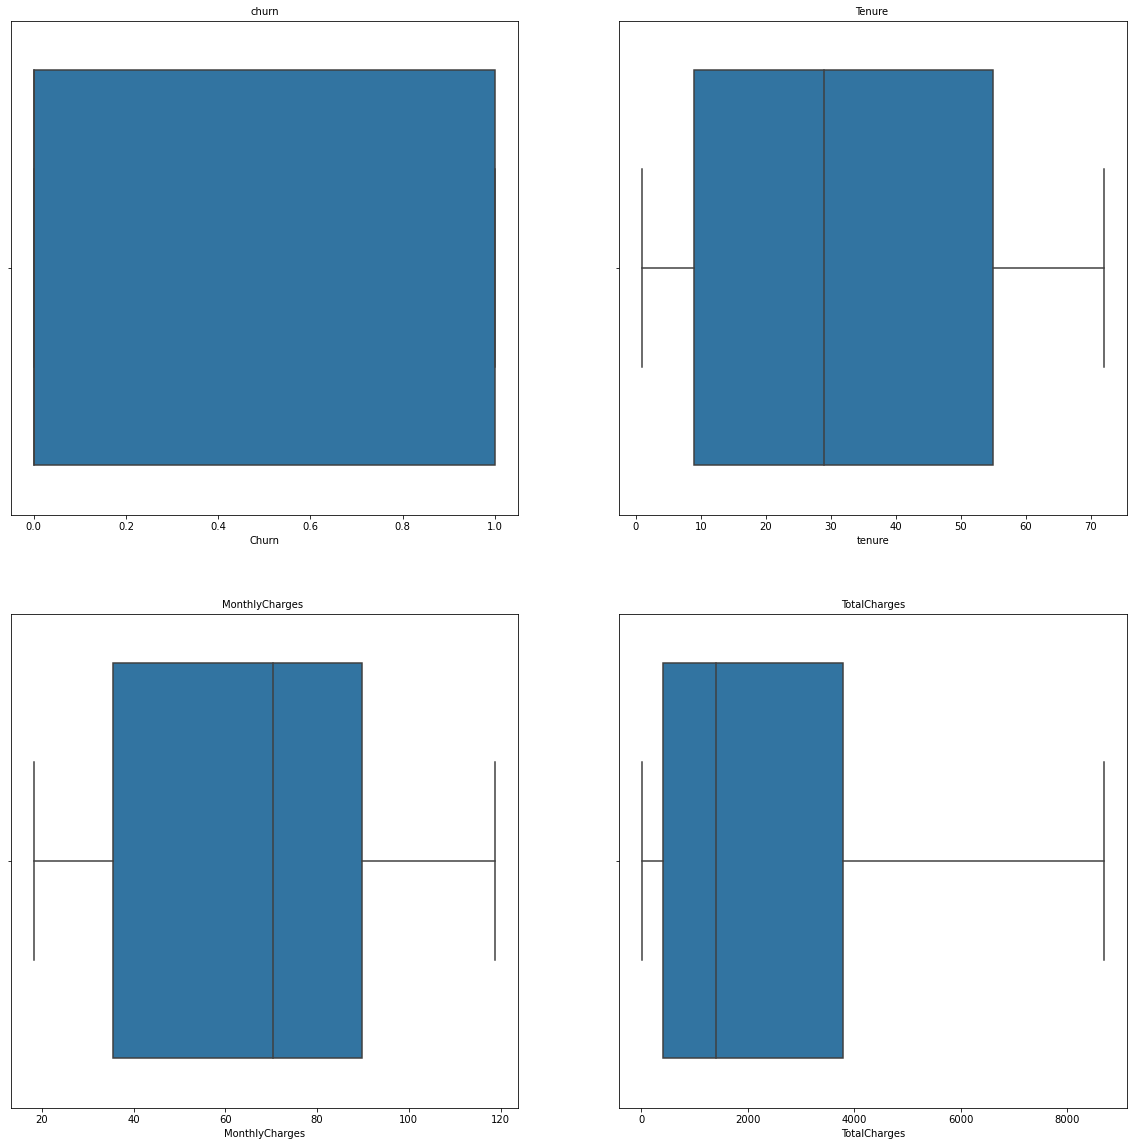

In [46]:
# Create Box plot for data set

fig, axes = plt.subplots(nrows=2, ncols =2)
fig.set_size_inches(20, 20)

a=sns.boxplot(df['Churn'],orient='v', ax=axes[0][0])
a.set_title("churn", fontsize=10)

b=sns.boxplot(df['tenure'], orient='v', ax=axes[0][1])
b.set_title("Tenure ", fontsize=10)

c=sns.boxplot(df['MonthlyCharges'], orient='v', ax=axes[1][0])
c.set_title("MonthlyCharges ", fontsize=10)

d=sns.boxplot(df['TotalCharges'], orient='v', ax=axes[1][1])
d.set_title("TotalCharges", fontsize=10)

plt.show()

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">  Bivariate analysis

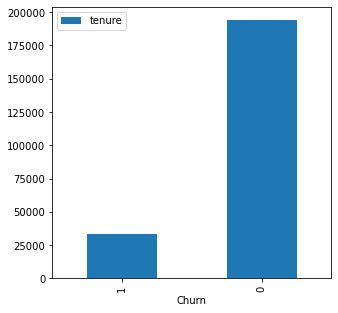

In [47]:
df.groupby(by=['Churn'])['tenure'].sum().reset_index().sort_values(['tenure']).tail(10).plot(x='Churn',
                                                                                                           y='tenure',
                                                                                                           kind='bar',
                                                                                                           figsize=(5,5))
plt.show()

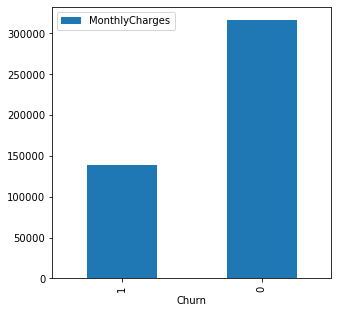

In [48]:
df.groupby(by=['Churn'])['MonthlyCharges'].sum().reset_index().sort_values(['MonthlyCharges']).tail(10).plot(x='Churn',
                                                                                                            y='MonthlyCharges',
                                                                                                      kind='bar',figsize=(5,5))
plt.show()

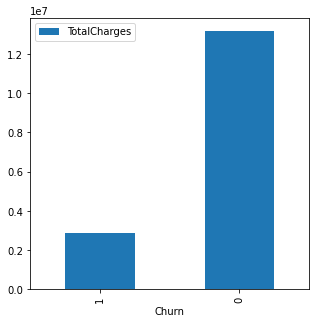

In [49]:
df.groupby(by=['Churn'])['TotalCharges'].sum().reset_index().sort_values(['TotalCharges']).tail(10).plot(x='Churn',
                                                                                                            y='TotalCharges',
                                                                                                      kind='bar',figsize=(5,5))
plt.show()

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">  Multivariate analysis

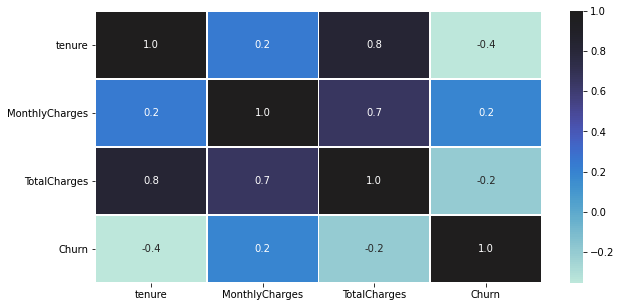

In [50]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.1f', center = 1 )
plt.show()

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   object 
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 


In [52]:
df_catg =pd.get_dummies(df_cat,drop_first=True)

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">  Scaling the numerical variables

In [53]:
df_num = df_num.apply(lambda x:(x-x.min()) / (x.max()-x.min()))

In [54]:
df_num.head()

,tenure,MonthlyCharges,TotalCharges
0,0.000000,0.115423,0.001275
1,0.464789,0.385075,0.215867
2,0.014085,0.354229,0.010310
3,0.619718,0.239303,0.210241
4,0.014085,0.521891,0.015330


In [55]:
#combining the categorical and numeric data into one
df1=pd.concat([df_num,df_catg],axis=1)

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">  Splitting the variables into Test and train

In [56]:
df1.columns

Index(['tenure', 'MonthlyCharges', 'TotalCharges', 'gender_Male',
       'SeniorCitizen_1', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [57]:
# the predictor variables into X dataframe
X = df1

# target into the y dataframe.  
y = df['Churn']

In [58]:
# Split X and y into training and test set in 75:25 ratio

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25 , random_state=1)

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">  Naive Bayes Model

In [59]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

In [60]:
NB_model = GaussianNB()
NB_model.fit(X_train, y_train)

GaussianNB()

In [61]:
## Performance Matrix on train data set
y_train_predict = NB_model.predict(X_train)
model_score = NB_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.6518771331058021
[[2195 1674]
 [ 162 1243]]
              precision    recall  f1-score   support

           0       0.93      0.57      0.71      3869
           1       0.43      0.88      0.58      1405

    accuracy                           0.65      5274
   macro avg       0.68      0.73      0.64      5274
weighted avg       0.80      0.65      0.67      5274



In [62]:
## Performance Matrix on test data set
y_test_predict = NB_model.predict(X_test)
model_score = NB_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.6558589306029579
[[741 553]
 [ 52 412]]
              precision    recall  f1-score   support

           0       0.93      0.57      0.71      1294
           1       0.43      0.89      0.58       464

    accuracy                           0.66      1758
   macro avg       0.68      0.73      0.64      1758
weighted avg       0.80      0.66      0.67      1758



<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">  SVM Model

In [63]:
from sklearn import svm

SVM_model= svm.SVC(random_state=1)
SVM_model.fit(X_train, y_train)

SVC(random_state=1)

In [64]:
## Performance Matrix on train data set
y_train_predict = SVM_model.predict(X_train)
model_score = SVM_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8158892681076981
[[3565  304]
 [ 667  738]]
              precision    recall  f1-score   support

           0       0.84      0.92      0.88      3869
           1       0.71      0.53      0.60      1405

    accuracy                           0.82      5274
   macro avg       0.78      0.72      0.74      5274
weighted avg       0.81      0.82      0.81      5274



In [66]:
## Performance Matrix on test data set
y_test_predict = SVM_model.predict(X_test)
model_score = SVM_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8026166097838453
[[1181  113]
 [ 234  230]]
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1294
           1       0.67      0.50      0.57       464

    accuracy                           0.80      1758
   macro avg       0.75      0.70      0.72      1758
weighted avg       0.79      0.80      0.79      1758



<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">  Discriminant Analysis Model

In [67]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
LDA_model= LinearDiscriminantAnalysis()
LDA_model.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [68]:
## Performance Matrix on train data set
y_train_predict = LDA_model.predict(X_train)
model_score = LDA_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.7995828593098218
[[3433  436]
 [ 621  784]]
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      3869
           1       0.64      0.56      0.60      1405

    accuracy                           0.80      5274
   macro avg       0.74      0.72      0.73      5274
weighted avg       0.79      0.80      0.79      5274



In [69]:
## Performance Matrix on test data set
y_test_predict = LDA_model.predict(X_test)
model_score = LDA_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.7940841865756542
[[1138  156]
 [ 206  258]]
              precision    recall  f1-score   support

           0       0.85      0.88      0.86      1294
           1       0.62      0.56      0.59       464

    accuracy                           0.79      1758
   macro avg       0.73      0.72      0.73      1758
weighted avg       0.79      0.79      0.79      1758



<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">  Ada boost Model

In [70]:
from sklearn.ensemble import AdaBoostClassifier


ADB_model = AdaBoostClassifier(n_estimators=100,random_state=1)
ADB_model.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=100, random_state=1)

In [71]:
## Performance Matrix on train data set
y_train_predict = ADB_model.predict(X_train)
model_score = ADB_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8103905953735305
[[3516  353]
 [ 647  758]]
              precision    recall  f1-score   support

           0       0.84      0.91      0.88      3869
           1       0.68      0.54      0.60      1405

    accuracy                           0.81      5274
   macro avg       0.76      0.72      0.74      5274
weighted avg       0.80      0.81      0.80      5274



In [72]:
## Performance Matrix on test data set
y_test_predict = ADB_model.predict(X_test)
model_score = ADB_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8020477815699659
[[1172  122]
 [ 226  238]]
              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1294
           1       0.66      0.51      0.58       464

    accuracy                           0.80      1758
   macro avg       0.75      0.71      0.72      1758
weighted avg       0.79      0.80      0.79      1758



<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">  XGBoost Model

In [73]:
import xgboost as xgb
XGB_model=xgb.XGBClassifier(random_state=1,learning_rate=0.01)
XGB_model.fit(X_train, y_train)

C:\Users\Chirag\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:46:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=12, num_parallel_tree=1, random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [74]:
## Performance Matrix on train data set
y_train_predict = XGB_model.predict(X_train)
model_score = XGB_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8160788775123247
[[3514  355]
 [ 615  790]]
              precision    recall  f1-score   support

           0       0.85      0.91      0.88      3869
           1       0.69      0.56      0.62      1405

    accuracy                           0.82      5274
   macro avg       0.77      0.74      0.75      5274
weighted avg       0.81      0.82      0.81      5274



In [75]:
## Performance Matrix on test data set
y_test_predict = XGB_model.predict(X_test)
model_score = XGB_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.7940841865756542
[[1160  134]
 [ 228  236]]
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1294
           1       0.64      0.51      0.57       464

    accuracy                           0.79      1758
   macro avg       0.74      0.70      0.72      1758
weighted avg       0.78      0.79      0.79      1758



<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">  KNN Model

In [76]:
from sklearn.neighbors import KNeighborsClassifier

KNN_model=KNeighborsClassifier()
KNN_model.fit(X_train,y_train)

KNeighborsClassifier()

In [77]:
## Performance Matrix on train data set
y_train_predict = KNN_model.predict(X_train)
model_score = KNN_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8403488813045127
[[3517  352]
 [ 490  915]]
              precision    recall  f1-score   support

           0       0.88      0.91      0.89      3869
           1       0.72      0.65      0.68      1405

    accuracy                           0.84      5274
   macro avg       0.80      0.78      0.79      5274
weighted avg       0.84      0.84      0.84      5274



In [78]:
## Performance Matrix on test data set
y_test_predict = KNN_model.predict(X_test)
model_score = KNN_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.7554038680318543
[[1085  209]
 [ 221  243]]
              precision    recall  f1-score   support

           0       0.83      0.84      0.83      1294
           1       0.54      0.52      0.53       464

    accuracy                           0.76      1758
   macro avg       0.68      0.68      0.68      1758
weighted avg       0.75      0.76      0.75      1758



<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">  Comparison of Different Models

Interest Class is 1 i.e. Churn = 1

looking at the performance of all the models on the Train Dataset and Test Dataset

considering no overfitting 

### Best Performing model is -  Adaboost

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">  Hyper parameter tuning for Adaboost

In [103]:
from sklearn.model_selection import GridSearchCV

param=[{'n_estimators' : [60,70,80,90,100,110,120,130,140,150,160,170],
       'algorithm' : ['SAMME', 'SAMME.R']}]

ADB_model = AdaBoostClassifier(random_state=1)
ADB_grid = GridSearchCV(estimator= ADB_model,param_grid = param,cv=3)
ADB_grid.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=AdaBoostClassifier(random_state=1),
             param_grid=[{'algorithm': ['SAMME', 'SAMME.R'],
                          'n_estimators': [60, 70, 80, 90, 100, 110, 120, 130,
                                           140, 150, 160, 170]}])

In [105]:
print('Best parameters for Decision Tree Classifier:',ADB_grid.best_params_)

Best parameters for Decision Tree Classifier: {'algorithm': 'SAMME', 'n_estimators': 60}


### TUNED ADABOOST MODEL

In [109]:
tuned_ADB_model = AdaBoostClassifier(algorithm='SAMME', n_estimators=60,random_state=1)
tuned_ADB_model.fit(X_train,y_train)

AdaBoostClassifier(algorithm='SAMME', n_estimators=60, random_state=1)

In [110]:
#train data
y_train_predict = tuned_ADB_model.predict(X_train)
model_score = tuned_ADB_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8075464543041335
[[3521  348]
 [ 667  738]]
              precision    recall  f1-score   support

           0       0.84      0.91      0.87      3869
           1       0.68      0.53      0.59      1405

    accuracy                           0.81      5274
   macro avg       0.76      0.72      0.73      5274
weighted avg       0.80      0.81      0.80      5274



In [111]:
#test data
y_train_predict = tuned_ADB_model.predict(X_test)
model_score = tuned_ADB_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_train_predict))
print(metrics.classification_report(y_test, y_train_predict))

0.8054607508532423
[[1179  115]
 [ 227  237]]
              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1294
           1       0.67      0.51      0.58       464

    accuracy                           0.81      1758
   macro avg       0.76      0.71      0.73      1758
weighted avg       0.79      0.81      0.80      1758



<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">  Cross Validation

In [112]:
#train data
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tuned_ADB_model, X_train, y_train, cv=10)
scores

array([0.78219697, 0.78787879, 0.81818182, 0.8030303 , 0.78747628,
       0.81024668, 0.85388994, 0.77798861, 0.78937381, 0.79696395])

In [113]:
#test data
scores = cross_val_score(tuned_ADB_model, X_test, y_test, cv=10)
scores

array([0.8125    , 0.76136364, 0.78409091, 0.78409091, 0.77840909,
       0.80681818, 0.83522727, 0.78977273, 0.79428571, 0.78857143])

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">  Model Prediction

In [114]:
y_pred=tuned_ADB_model.predict(X_test)

In [115]:
cm=confusion_matrix(y_test,y_pred)

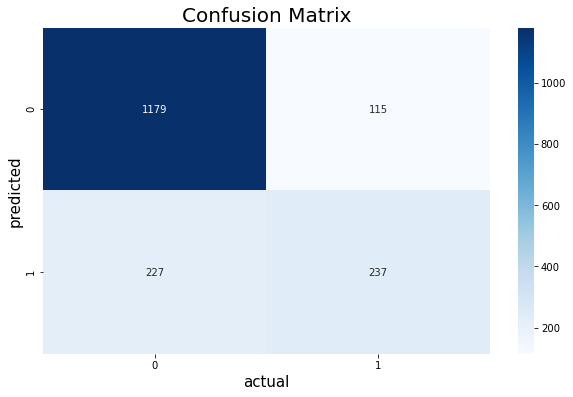

In [116]:
plt.figure(figsize=((10,6)))
sns.heatmap(cm,annot=True,cmap='Blues',fmt='.0f')
plt.title("Confusion Matrix",fontsize=20)
plt.xlabel("actual",fontsize=15)
plt.ylabel("predicted",fontsize=15)
plt.show()